# Regression with Different Basis Functions

In [1]:
import collections
import math
import random
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

fsize=(20.0, 15.0)
linewidth = 1.0
dotsize = 15

### Define the True Function and Generate the Sample Data

In [2]:
def f(x):
    return math.sin(x)
print(f(math.pi / 2))

1.0


In [3]:
f_points = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
f_points['y'] = f_points.x.apply(f)

In [4]:
num_points = 20

In [5]:
sample = pd.DataFrame({'x': np.linspace(0, math.pi * 2, num_points)})
sample['y'] = sample.x.apply(lambda x: f(x) + (np.random.randn() * 0.2))

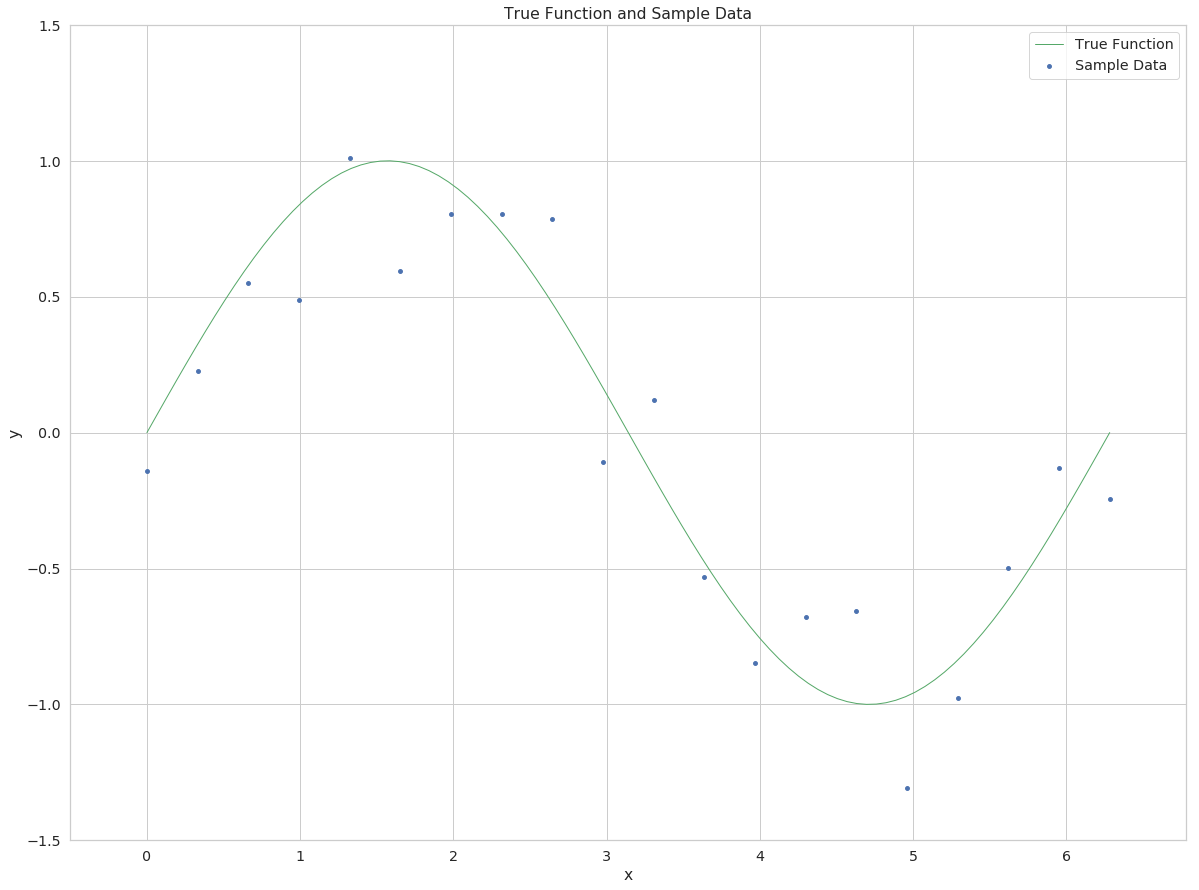

In [6]:
_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(sample.x, sample.y, color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True Function and Sample Data')
_ = plt.legend(loc='upper right')

### Simple Linear Regression

In [7]:
def straight_line(x, a, b):
    return x*a + b

Fitting a straight line in the form of y(x) = ax + b
Parameter Estimates:
a = -0.2315800685074903
b = 0.6906029931881089


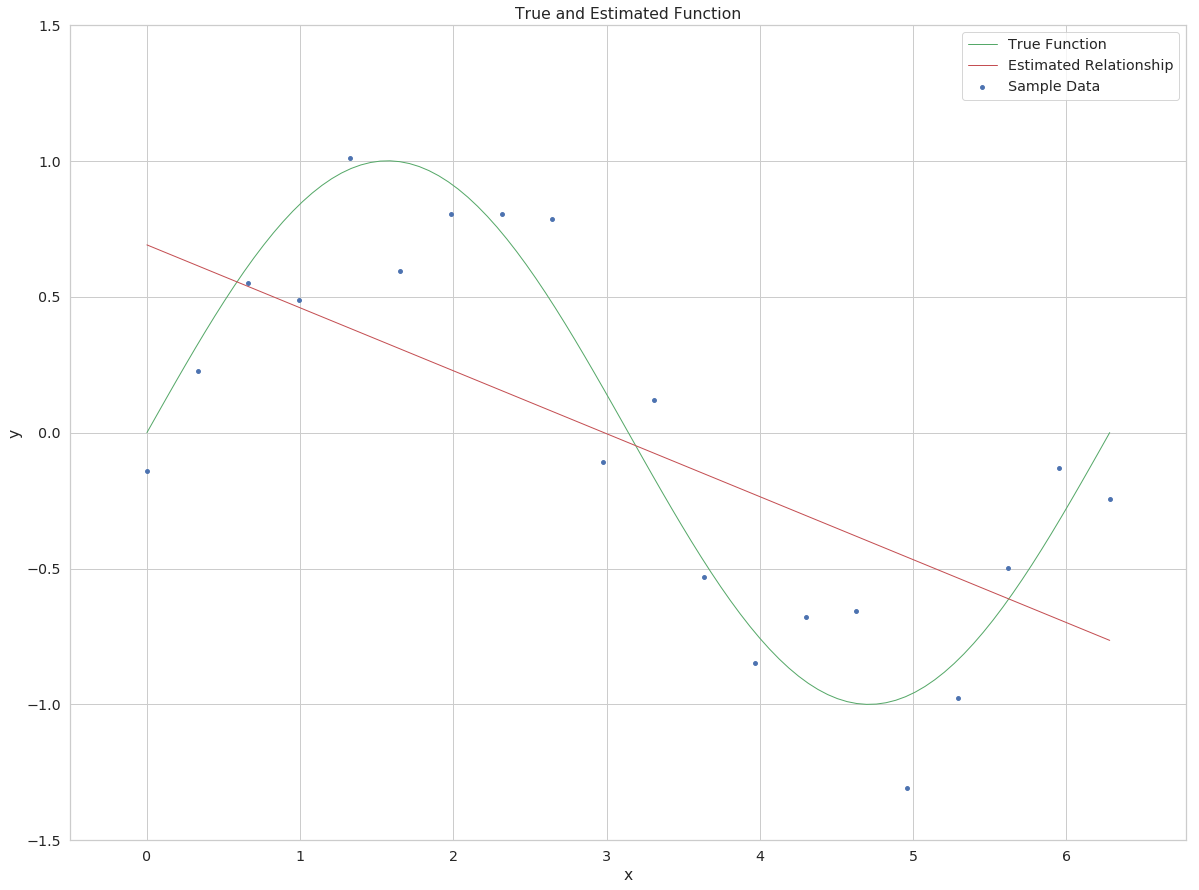

In [8]:
popt, pcov = scipy.optimize.curve_fit(straight_line, sample.x, sample.y)

print('Fitting a straight line in the form of y(x) = ax + b')

print('Parameter Estimates:')
print('a =', popt[0])
print('b =', popt[1])

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
pred['y'] = straight_line(pred.x, popt[0], popt[1])

_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(sample.x, sample.y, color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend(loc='upper right')

### Fit a Sigmoid

In [9]:
def sigmoid(x, a, b, c, d):
    return a / (1 + b * np.power(np.e, c - x)) + d

Fitting a logistic function in the form of y(x) = a / (1 + b * e^(c - x)) + d
Parameter Estimates:
a = 4.843118039826687
b = -0.1380799572733321
c = -0.0642615602828542
d = -4.9999999999982325


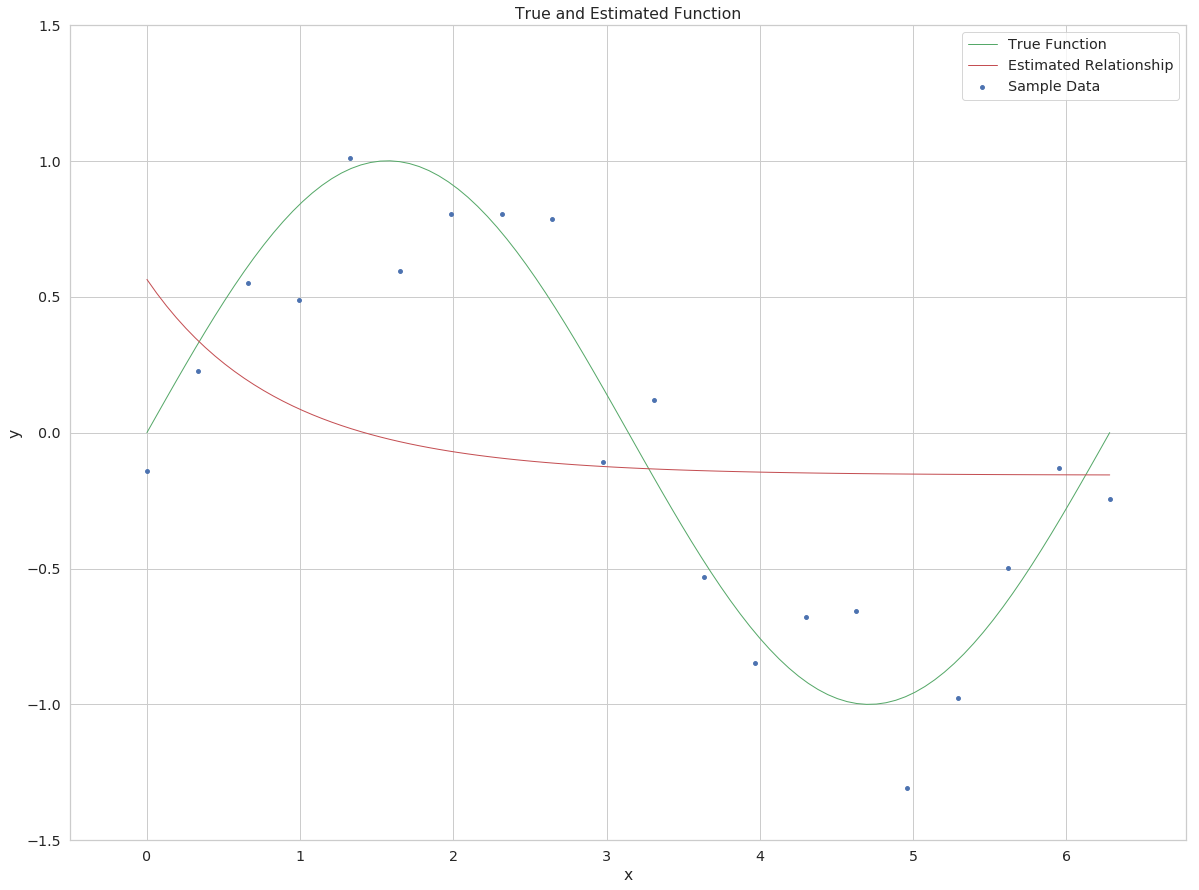

In [10]:
popt, pcov = scipy.optimize.curve_fit(sigmoid, sample.x, sample.y, bounds=(-5, 5))

print('Fitting a logistic function in the form of y(x) = a / (1 + b * e^(c - x)) + d')
print

print('Parameter Estimates:')
print('a =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
print('d =', popt[3])

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
pred['y'] = sigmoid(pred.x, popt[0], popt[1], popt[2], popt[3])

_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(sample.x, sample.y, color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend(loc='upper right')

### Fit two Gaussians

In [11]:
def gaussian(x, mu, sig2):
    return (1.0 / np.power(2 * sig2 * np.pi, 0.5)) * np.exp(-(np.power(x - mu, 2.)) / (2.0 * sig2))

def two_gaussians(x, a1, m1, s1, a2, m2, s2):
    return a1 * gaussian(x, m1, s1) + a2 * gaussian(x, m2, s2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Fitting a logistic function in the form of y(x) = a1 * N(m1, s1) + a2 * N(m2, s2)

Parameter Estimates:
a1 = 1.3865903930612917
m1 = 1.466172206647508
s1 = 0.4111658190773628
a2 = 0.639939411279394
m2 = 2.4887261770244975
s2 = 0.00816702568244317


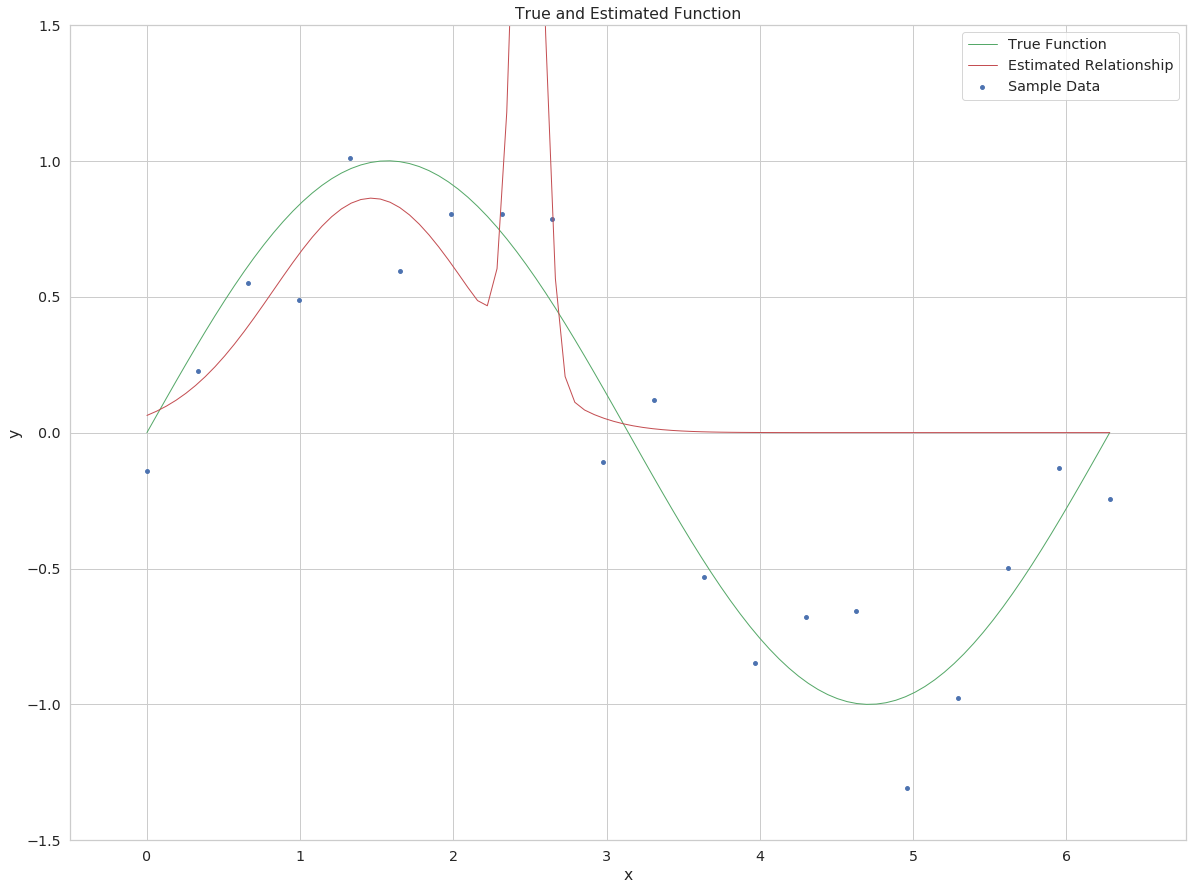

In [12]:
popt, pcov = scipy.optimize.curve_fit(two_gaussians, sample.x, sample.y)

print('Fitting a logistic function in the form of y(x) = a1 * N(m1, s1) + a2 * N(m2, s2)')
print()

print('Parameter Estimates:')
print('a1 =', popt[0])
print('m1 =', popt[1])
print('s1 =', popt[2])
print('a2 =', popt[3])
print('m2 =', popt[4])
print('s2 =', popt[5])

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
pred['y'] = two_gaussians(pred.x, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5])

_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(sample.x, sample.y, color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend(loc='upper right')